In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [2]:
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv"
reviews = pd.read_csv(url)
reviews = reviews.set_index('FILM')
reviews.head(2)

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
FILM,,,,,,,,,,,,,,,,,,,,,
Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5


In [3]:
print reviews.columns.value_counts()
print '\n\t\tTOTAL COLUMNS',reviews.columns.value_counts().sum()

Metacritic_user_nom           1
Metacritic_user_vote_count    1
RottenTomatoes                1
Metacritic                    1
Metacritic_user_norm_round    1
RT_user_norm_round            1
IMDB_norm_round               1
Fandango_Stars                1
Fandango_Difference           1
IMDB_norm                     1
Metacritic_User               1
Fandango_Ratingvalue          1
RT_norm_round                 1
Fandango_votes                1
IMDB                          1
Metacritic_norm               1
RT_user_norm                  1
IMDB_user_vote_count          1
Metacritic_norm_round         1
RT_norm                       1
RottenTomatoes_User           1
dtype: int64

		TOTAL COLUMNS 21


In [4]:
reviews = reviews.reset_index()
reviews = reviews[['FILM','RT_user_norm','Metacritic_user_nom',
                         'IMDB_norm','Fandango_Ratingvalue','Fandango_Stars']]
reviews.head()

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.90,4.5,5.0
1,Cinderella (2015),4.0,3.75,3.55,4.5,5.0
2,Ant-Man (2015),4.5,4.05,3.90,4.5,5.0
3,Do You Believe? (2015),4.2,2.35,2.70,4.5,5.0
4,Hot Tub Time Machine 2 (2015),1.4,1.70,2.55,3.0,3.5


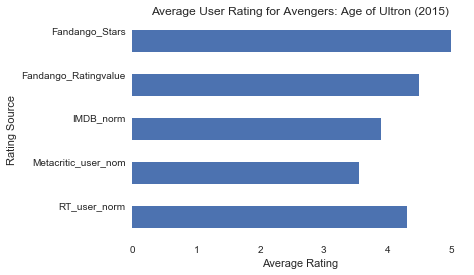

In [6]:
bar_widths = reviews.ix[0,reviews.columns[1:]].values
bar_positions = np.arange(5) + 0.75
tick_positions = range(1,6)

fig, ax = plt.subplots()
ax.barh(bottom=bar_positions, width=bar_widths, height=0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(reviews.columns[1:])
ax.set_ylabel('Rating Source')
ax.set_xlabel('Average Rating')
ax.set_title('Average User Rating for Avengers: Age of Ultron (2015)')
for key,spine in ax.spines.items():
        spine.set_visible(False)
    
plt.show()

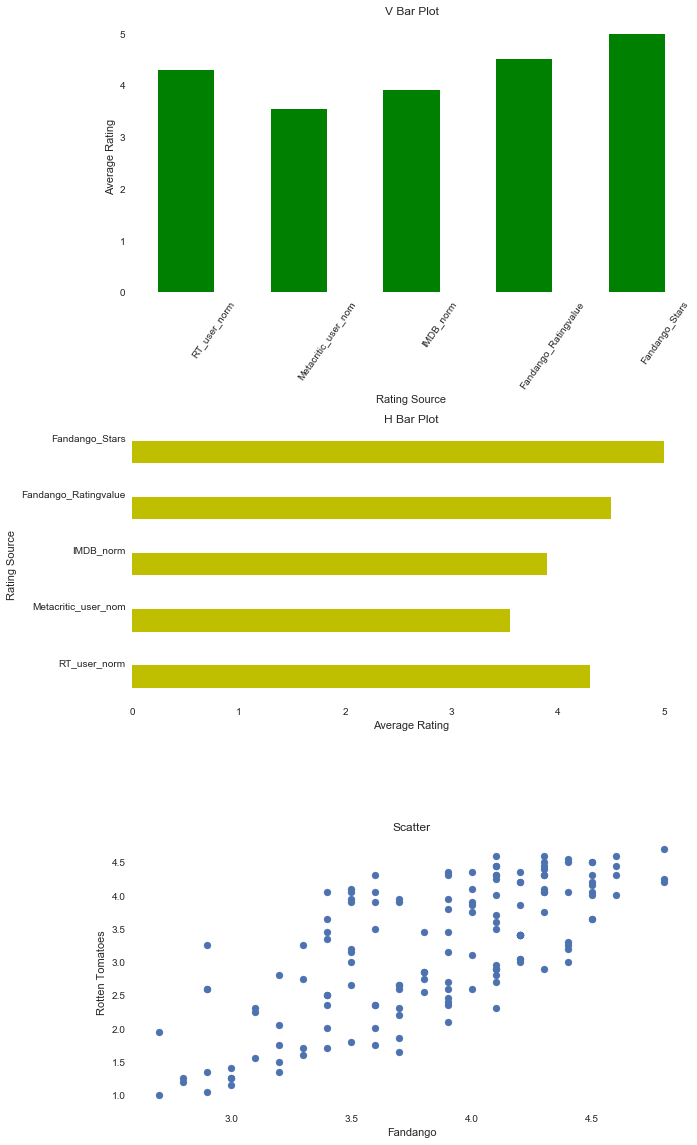

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,20))
bar_positions = np.arange(5) + 0.75
bar_hw = reviews.ix[0,reviews.columns[1:]].values
ticks = range(1,6)

ax1.bar(left=bar_positions, height=bar_hw, width=0.5, color='green')
ax1.set_xticks(ticks)
ax1.set_xticklabels(reviews.columns[1:], rotation=55)
ax1.set_xlabel('Rating Source')
ax1.set_ylabel('Average Rating')
ax1.set_title('V Bar Plot')
for key,spine in ax1.spines.items():
        spine.set_visible(False)


ax2.barh(bottom=bar_positions, width=bar_hw, height=0.4, color='y')
ax2.set_yticks(ticks)
ax2.set_yticklabels(reviews.columns[1:])
ax2.set_ylabel('Rating Source')
ax2.set_xlabel('Average Rating')
ax2.set_title('H Bar Plot')
for key,spine in ax2.spines.items():
        spine.set_visible(False)


ax3.scatter(reviews['Fandango_Ratingvalue'], reviews['RT_user_norm'])
ax3.set_xlabel('Fandango')
ax3.set_ylabel('Rotten Tomatoes')
ax3.set_title('Scatter')
for key,spine in ax3.spines.items():
        spine.set_visible(False)

fig.subplots_adjust(hspace=0.5)


plt.show()

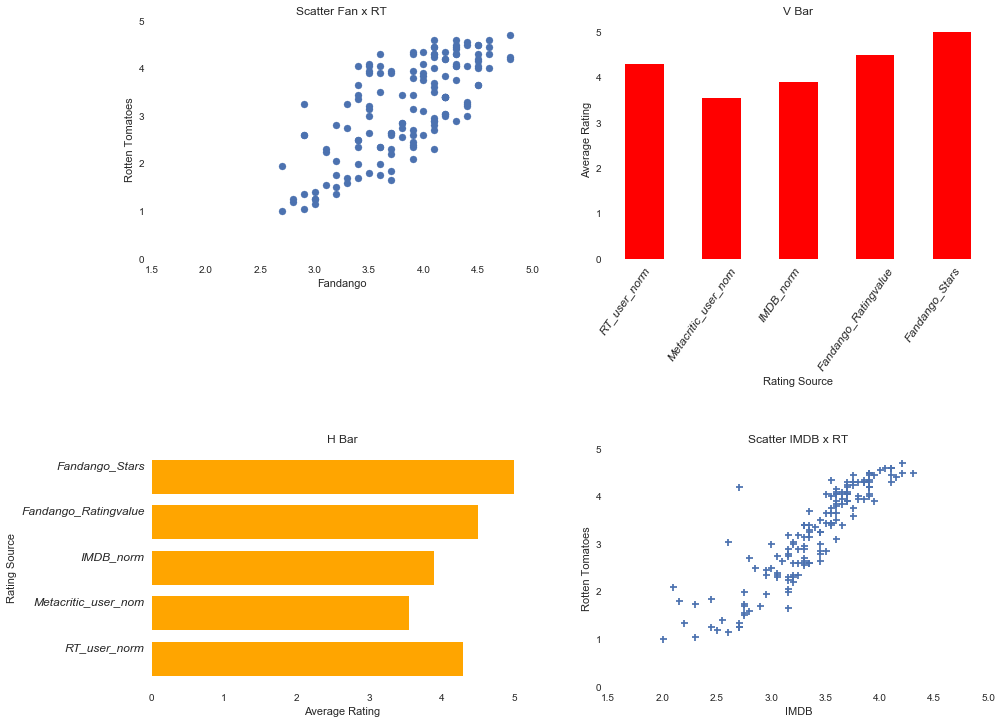

In [24]:
fig = plt.figure(figsize=(15,28))
ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)
    
bar_positions = np.arange(5) + 0.75
bar_hw = reviews.ix[0,reviews.columns[1:].values]
  
#1    
ax1.scatter(reviews['Fandango_Ratingvalue'], reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax1.set_title('Scatter Fan x RT')
ax1.set_xlim(1.5,5)
ax1.set_ylim(0,5)
for key,spine in ax1.spines.items():
        spine.set_visible(False)

#2
ax2.bar(left=bar_positions, height=bar_hw, width=0.5, color='red')
ax2.set_xticks(np.arange(0.5,5.5))
ax2.set_xticklabels(reviews.columns[1:], rotation=55, 
                    fontsize='large', position=(0,-0.001), fontstyle='oblique')
ax2.set_xlabel('Rating Source')
ax2.set_ylabel('Average Rating')
ax2.set_title('V Bar')
for key,spine in ax2.spines.items():
        spine.set_visible(False)

#3
ax3.barh(bottom=bar_positions, width=bar_hw, height=0.75, color='orange')
ax3.set_yticks(range(1,6))
ax3.set_yticklabels(reviews.columns[1:], fontstyle='italic',
                   fontsize='large', position=(0,0))
ax3.set_ylabel('Rating Source')
ax3.set_xlabel('Average Rating')
ax3.set_title('H Bar')
for key,spine in ax3.spines.items():
        spine.set_visible(False)

#4
ax4.scatter(reviews['IMDB_norm'], reviews['RT_user_norm'], marker='+')
ax4.set_xlabel('IMDB')
ax4.set_ylabel('Rotten Tomatoes')
ax4.set_title('Scatter IMDB x RT')
ax4.set_xlim(1.5,5)
ax4.set_ylim(0,5)
for key,spine in ax4.spines.items():
        spine.set_visible(False)
        
fig.subplots_adjust(hspace=0.8)
plt.show()

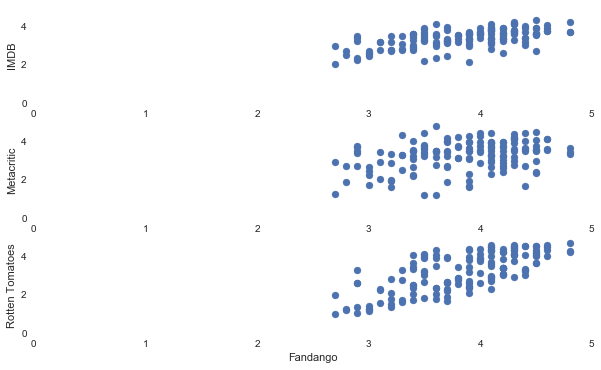

In [13]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(reviews['Fandango_Ratingvalue'], reviews['IMDB_norm'])
ax1.set_xlabel('Fandango'); ax1.set_ylabel('IMDB')
ax1.set_xlim(0,5); ax1.set_ylim(0,5)
for key,spine in ax1.spines.items():
        spine.set_visible(False)

ax2.scatter(reviews['Fandango_Ratingvalue'], reviews['Metacritic_user_nom'])
ax2.set_xlabel('Fandango'); ax2.set_ylabel('Metacritic')
ax2.set_xlim(0,5); ax2.set_ylim(0,5)
for key,spine in ax2.spines.items():
        spine.set_visible(False)

ax3.scatter(reviews['Fandango_Ratingvalue'], reviews['RT_user_norm'])
ax3.set_xlabel('Fandango'); ax3.set_ylabel('Rotten Tomatoes')
ax3.set_xlim(0,5); ax3.set_ylim(0,5)
for key,spine in ax3.spines.items():
        spine.set_visible(False)

plt.show()

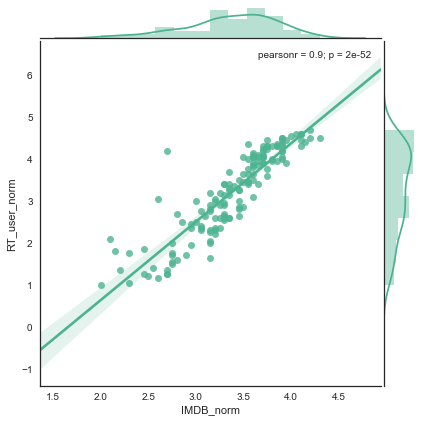

In [16]:
sns.jointplot(reviews['IMDB_norm'], reviews['RT_user_norm'], kind='reg',
              color='#4CB391',size=6, space=0.1, ratio=10)

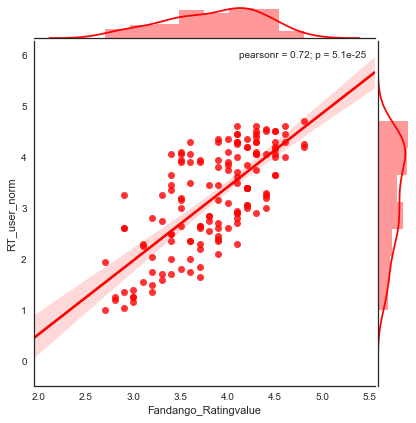

In [17]:
sns.jointplot(reviews['Fandango_Ratingvalue'], reviews['RT_user_norm'], kind='reg',
              color='red',size=6, space=0.1,ratio=10)

In [18]:
#reviews['Fandango_Ratingvalue'].value_counts().sort_index()
#reviews['IMDB_norm'].value_counts().sort_index()

print '>>FREQUENCY DISTRIBUTIONS:'
print 'Fandango: ',reviews['Fandango_Ratingvalue'].value_counts().count()
print '    IMDB: ',reviews['IMDB_norm'].value_counts().count()

>>FREQUENCY DISTRIBUTIONS:
Fandango:  21
    IMDB:  41


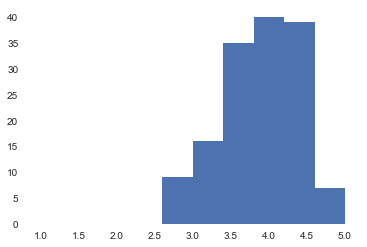

In [19]:
fig, ax = plt.subplots()
ax.hist(reviews['Fandango_Ratingvalue'], range=(1,5))
for key,spine in ax.spines.items():
        spine.set_visible(False)
        
plt.show()

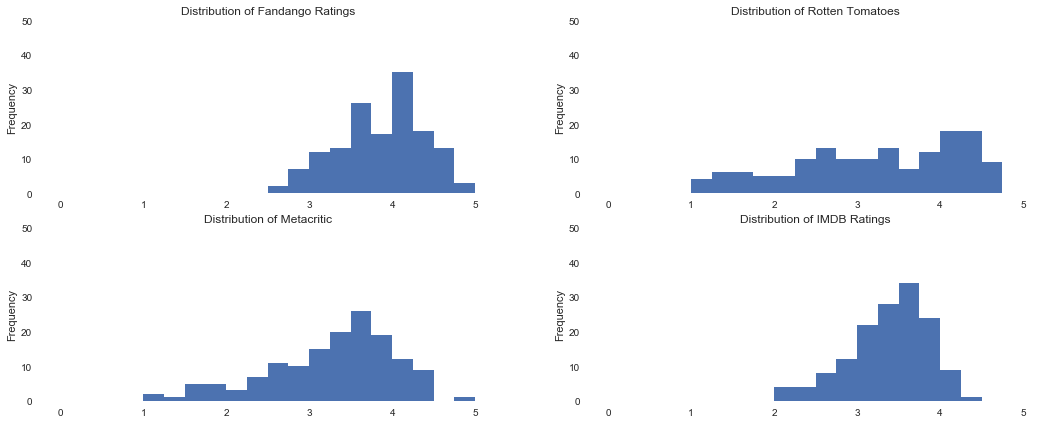

In [22]:
fig, ( (ax1, ax2), (ax3, ax4) ) = plt.subplots(nrows=2, ncols=2, figsize=(18,7))

ax1.hist(reviews['Fandango_Ratingvalue'], bins=20, range=(0,5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0,50); ax1.set_ylabel('Frequency')
for key,spine in ax1.spines.items():
        spine.set_visible(False)

ax2.hist(reviews['RT_user_norm'], bins=20, range=(0,5))
ax2.set_title('Distribution of Rotten Tomatoes')
ax2.set_ylim(0,50); ax2.set_ylabel('Frequency')
for key,spine in ax2.spines.items():
        spine.set_visible(False)

ax3.hist(reviews['Metacritic_user_nom'], bins=20, range=(0,5))
ax3.set_title('Distribution of Metacritic')
ax3.set_ylim(0,50); ax3.set_ylabel('Frequency')
for key,spine in ax3.spines.items():
        spine.set_visible(False)

ax4.hist(reviews['IMDB_norm'], bins=20, range=(0,5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0,50); ax4.set_ylabel('Frequency')
for key,spine in ax4.spines.items():
        spine.set_visible(False)


plt.show()

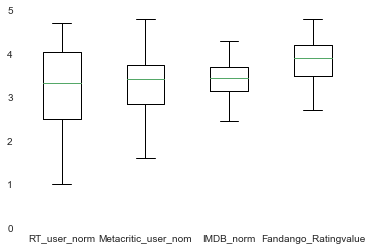

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']

ax.boxplot(reviews[cols].values)
ax.set_ylim(0,5); ax.set_xticklabels(cols)
for key,spine in ax.spines.items():
        spine.set_visible(False)
plt.show()